<h1>IMPORTAÇÃO DE BBT<h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h1>CRIANDO DADOS<h1>

In [4]:
Local=['nascente','nascente','nascente','nascente','area rural','area rural','area rural','area rural','area urbana','area urbana','area urbana','area urbana']
pH=[4.5,3.5,4.5,3.5,5.8,5.5,5,4.5,6.5,7,6.8,6]
N=[1.2,1.3,1.2,1.3,1.2,1.1,1.3,1.2,2.1,1.8,1.5,1.5]
Oxigen=[0.5,0.5,0.6,0.7,0.5,0.4,0.5,0.3,0.4,0.5,0.5,0.4]
MatOrg=[5.5,5.2,5.3,5.4,5.2,5.4,5.5,5.8,8.2,8.3,8.4,8.5]

dataraiz=pd.DataFrame()
dataraiz['pH']=pH
dataraiz['N']=N
dataraiz['Oxigen']=Oxigen
dataraiz['MatOrg']=MatOrg

dataraiz

,pH,N,Oxigen,MatOrg
0,4.5,1.2,0.5,5.5
1,3.5,1.3,0.5,5.2
2,4.5,1.2,0.6,5.3
3,3.5,1.3,0.7,5.4
4,5.8,1.2,0.5,5.2
5,5.5,1.1,0.4,5.4
6,5.0,1.3,0.5,5.5
7,4.5,1.2,0.3,5.8
8,6.5,2.1,0.4,8.2
9,7.0,1.8,0.5,8.3


<h1>NORMALIZANDO OS DADOS<h1>

In [5]:
from sklearn.preprocessing import StandardScaler

model=StandardScaler()
model.fit(dataraiz)
df=pd.DataFrame(model.transform(dataraiz),columns=dataraiz.columns)
df

,pH,N,Oxigen,MatOrg
0,-0.660270,-0.681500,0.169031,-0.639504
1,-1.530956,-0.325935,0.169031,-0.854665
2,-0.660270,-0.681500,1.183216,-0.782945
3,-1.530956,-0.325935,2.197401,-0.711225
4,0.471622,-0.681500,0.169031,-0.854665
5,0.210416,-1.037065,-0.845154,-0.711225
6,-0.224927,-0.325935,0.169031,-0.639504
7,-0.660270,-0.681500,-1.859339,-0.424344
8,1.081102,2.518588,-0.845154,1.296939
9,1.516445,1.451892,0.169031,1.368659


<h1>APLICANDO PCA COM SKLEARN<h1>

In [6]:
from sklearn.decomposition import PCA
iniciar=PCA(n_components=4)
iniciar.fit(df)
matrix=iniciar.transform(df)
datamatrix=pd.DataFrame(matrix, columns='comp1 comp2 comp3 comp4'.split(),index=dataraiz.index)
datamatrix['comp2']=-datamatrix['comp2']
datamatrix['Local']=Local
datamatrix

,comp1,comp2,comp3,comp4,Local
0,-1.143706,-0.160112,0.009558,0.064392,nascente
1,-1.561887,-0.049331,0.871650,0.085939,nascente
2,-1.509676,0.756296,-0.247514,-0.032162,nascente
3,-2.043419,1.851392,0.354268,0.236123,nascente
4,-0.643925,-0.224054,-0.813539,-0.564985,area rural
5,-0.609963,-1.255209,-0.592224,-0.203892,area rural
6,-0.715546,-0.049979,-0.081564,-0.270566,area rural
7,-0.453501,-2.004246,0.524242,0.200285,area rural
8,2.917174,0.255294,1.019032,-0.543043,area urbana
9,2.353445,0.829121,-0.235086,-0.167277,area urbana


Text(3, -1, 'pH')

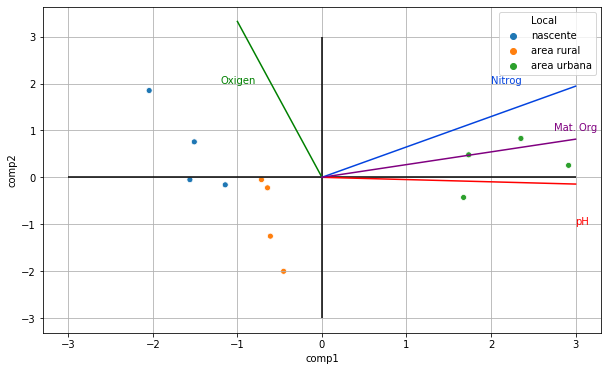

In [11]:
components=pd.DataFrame(iniciar.components_.T,index=dataraiz.columns,columns='comp1 comp2 comp3 comp4'.split())
components['comp2']=-components['comp2']

plt.figure(figsize=(10,6))
sns.scatterplot('comp1','comp2',data=datamatrix,hue='Local')
plt.grid()
plt.vlines(0,-3,3)
plt.hlines(0,-3,3)
           
#plotar retas das variáveis no gráfico           
#oxigen
xO=np.linspace(-1,0,20)

valueOXIG=components.iloc[2,1]/components.iloc[2,0]
plt.plot(xO,np.abs(valueOXIG*xO),c='g')
#pH
xP=np.linspace(0,3,20)

valuepH=components.iloc[0,1]/components.iloc[0,0]
plt.plot(xP,-np.abs(valuepH*xP),c='r')

#N
valueN=components.iloc[1,1]/components.iloc[1,0]
plt.plot(xP,np.abs(valueN*xP),c='#0343DF')

#Materia Org
valueM=components.iloc[3,1]/components.iloc[3,0]
plt.plot(xP,np.abs(valueM*xP),c='purple')

plt.text(-1.2, 2, 'Oxigen',c='green')
plt.text(2, 2, 'Nitrog',c='#0343DF')
plt.text(2.75, 1, 'Mat. Org',c='purple')
plt.text(3, -1, 'pH',c='r')

In [12]:
components


,comp1,comp2,comp3,comp4
pH,0.552160,-0.026494,-0.728617,-0.404395
N,0.528118,0.342179,0.635822,-0.446917
Oxigen,-0.278549,0.925910,-0.254541,0.017627
MatOrg,0.581911,0.157806,-0.007524,0.797759
